## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading the dataset

In [2]:
df_raw = pd.read_csv(r"C:\Users\Ksnes\OneDrive\Desktop\Traffic.csv")

In [3]:
df_raw.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
df_raw.shape

(2976, 9)

## EDA

In [18]:
# Display basic statistics of the dataset
print("Basic Statistics of the Dataset:")
print(df_raw.describe())

Basic Statistics of the Dataset:
              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  2976.000000  2976.000000  2976.000000  2976.000000  2976.000000   
mean     16.000000    68.696573    14.917339    15.279570    15.324933   
std       8.945775    45.850693    12.847518    14.341986    10.603833   
min       1.000000     6.000000     0.000000     0.000000     0.000000   
25%       8.000000    19.000000     5.000000     1.000000     6.000000   
50%      16.000000    64.000000    12.000000    12.000000    14.000000   
75%      24.000000   107.000000    22.000000    25.000000    23.000000   
max      31.000000   180.000000    70.000000    50.000000    40.000000   

             Total  
count  2976.000000  
mean    114.218414  
std      60.190627  
min      21.000000  
25%      55.000000  
50%     109.000000  
75%     164.000000  
max     279.000000  


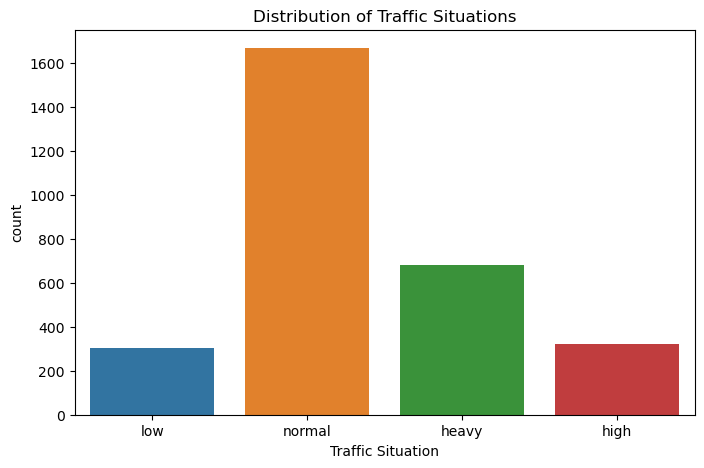

In [19]:
# Display the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Traffic Situation', data=df_raw)
plt.title('Distribution of Traffic Situations')
plt.show()


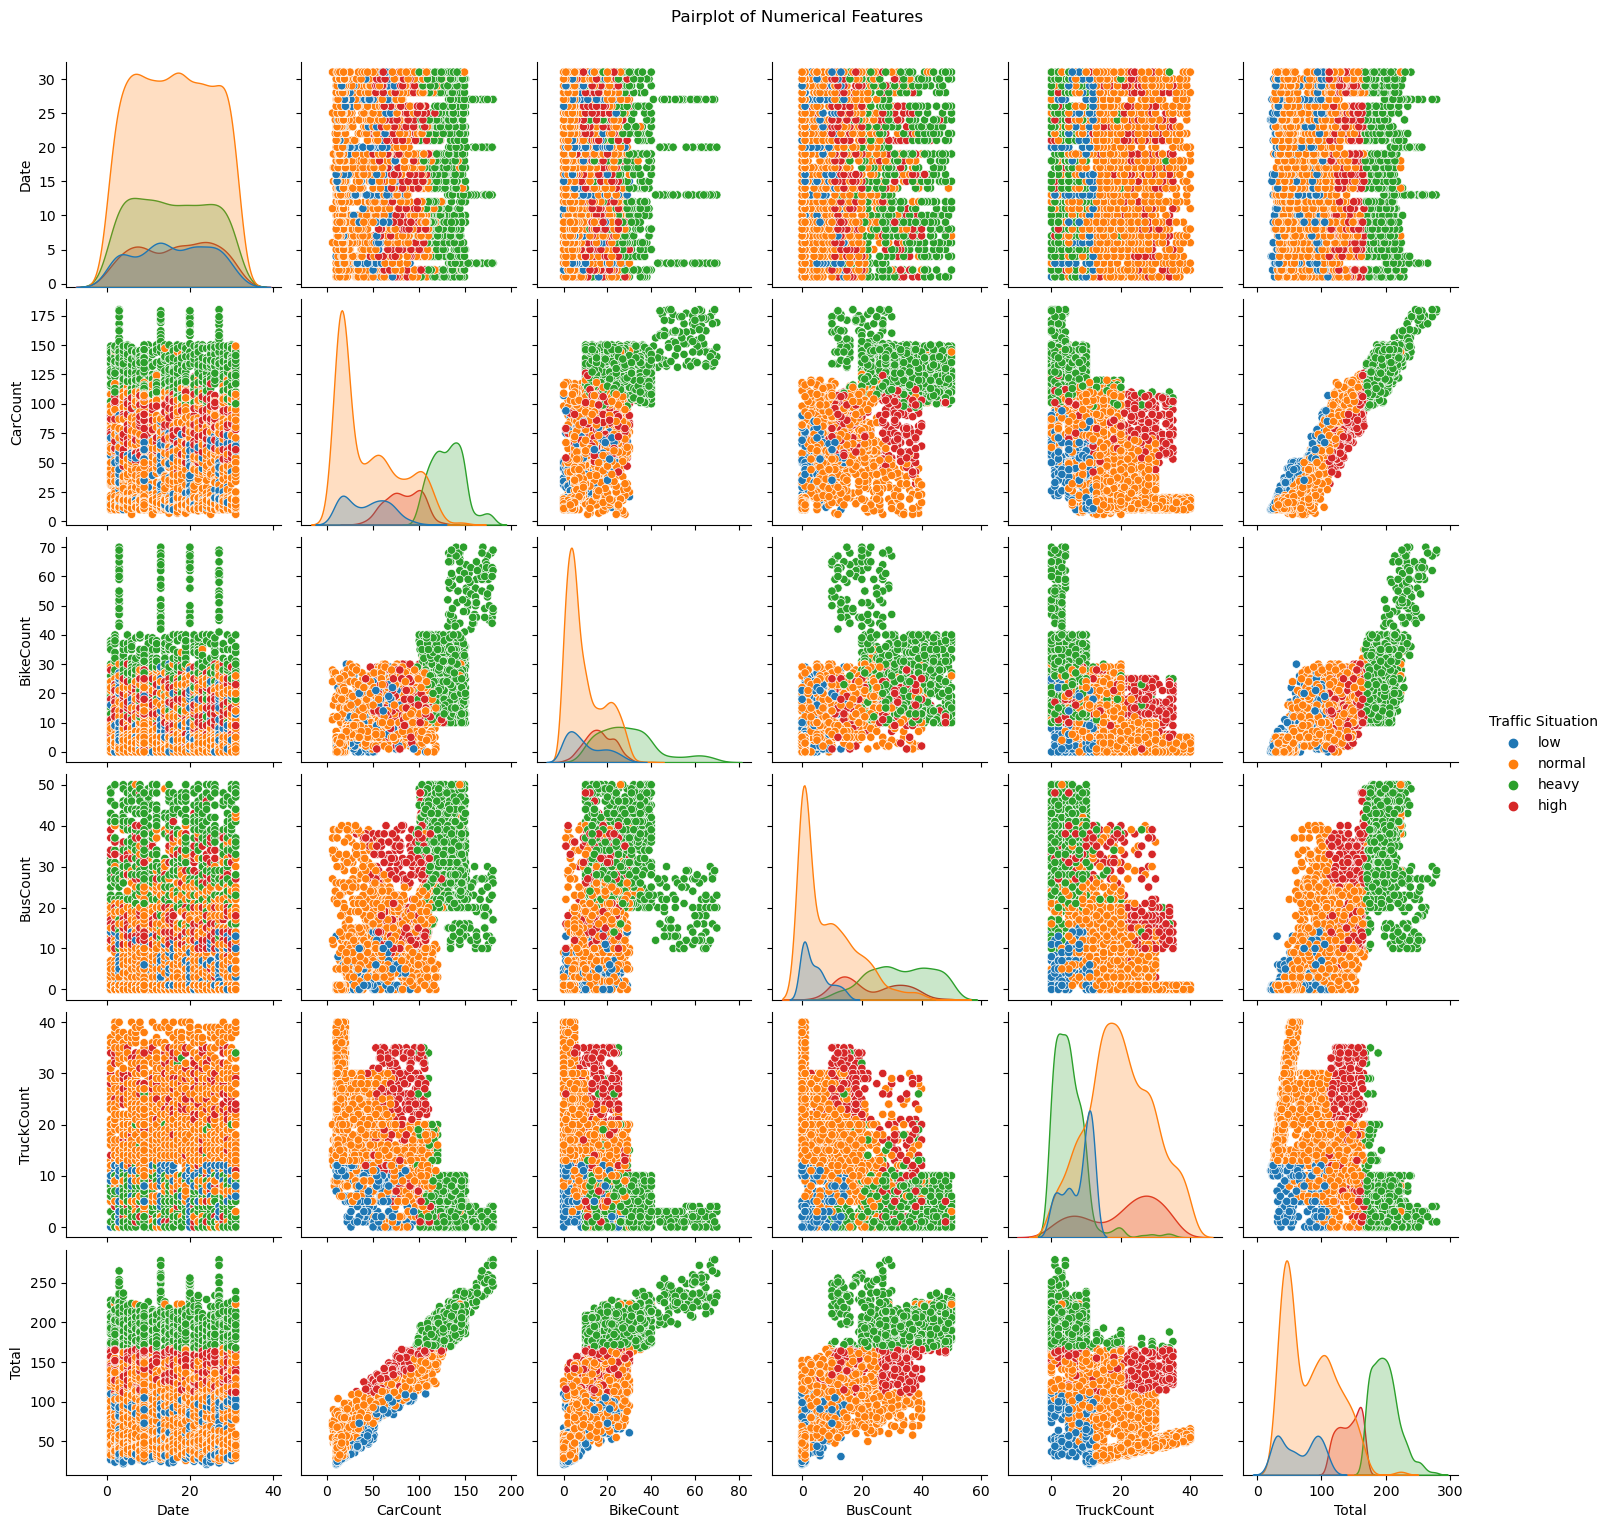

In [20]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df_raw, hue='Traffic Situation')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

C:\Users\Ksnes\AppData\Local\Temp\ipykernel_16412\5835803.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_raw.corr()


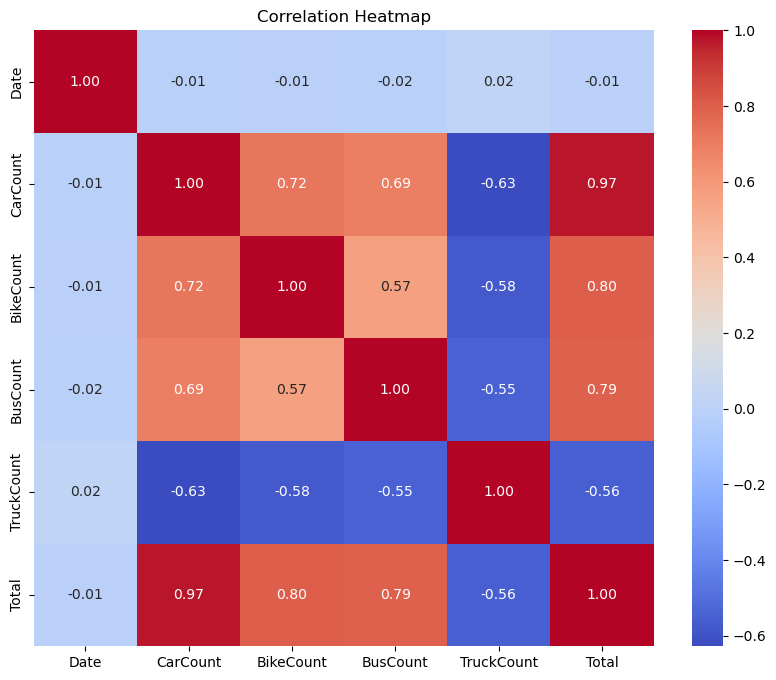

In [21]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df_raw.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Data preprocessing

In [6]:
df_raw.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [7]:
# Handle missing values (if any)
df_processed = df_raw.dropna()

In [8]:
# Drop unnecessary columns
df_processed = df_raw.drop(['Time', 'Date', 'Day of the week'], axis=1)

In [9]:
# Encode categorical target variable if needed
le = LabelEncoder()
df_processed['Traffic Situation'] = le.fit_transform(df_processed['Traffic Situation'])

## Feature and target selection

In [10]:
# Separate features and target variable
X = df_processed.drop('Traffic Situation', axis=1)
y = df_processed['Traffic Situation']

## Data splitting

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize the features (not always necessary for all algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model training and evaluation

In [13]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))

Logistic Regression Accuracy: 0.9026845637583892
Confusion Matrix:
 [[127   0   0   0]
 [  5  45   0  13]
 [  0   0  46  20]
 [  8   4   8 320]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       127
           1       0.92      0.71      0.80        63
           2       0.85      0.70      0.77        66
           3       0.91      0.94      0.92       340

    accuracy                           0.90       596
   macro avg       0.90      0.84      0.86       596
weighted avg       0.90      0.90      0.90       596



In [14]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))

Naive Bayes Accuracy: 0.8087248322147651
Confusion Matrix:
 [[122   5   0   0]
 [ 10  44   0   9]
 [  0   0  51  15]
 [ 13  59   3 265]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90       127
           1       0.41      0.70      0.51        63
           2       0.94      0.77      0.85        66
           3       0.92      0.78      0.84       340

    accuracy                           0.81       596
   macro avg       0.78      0.80      0.78       596
weighted avg       0.85      0.81      0.82       596



In [15]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
print("K-Nearest Neighbors Accuracy:", accuracy_score(y_test, knn_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))
print("Classification Report:\n", classification_report(y_test, knn_pred))

K-Nearest Neighbors Accuracy: 0.9395973154362416
Confusion Matrix:
 [[118   6   0   3]
 [  3  56   0   4]
 [  0   0  63   3]
 [  8   4   5 323]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       127
           1       0.85      0.89      0.87        63
           2       0.93      0.95      0.94        66
           3       0.97      0.95      0.96       340

    accuracy                           0.94       596
   macro avg       0.91      0.93      0.92       596
weighted avg       0.94      0.94      0.94       596



In [16]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.9328859060402684
Confusion Matrix:
 [[126   1   0   0]
 [  5  51   0   7]
 [  0   0  60   6]
 [  8   5   8 319]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       127
           1       0.89      0.81      0.85        63
           2       0.88      0.91      0.90        66
           3       0.96      0.94      0.95       340

    accuracy                           0.93       596
   macro avg       0.91      0.91      0.91       596
weighted avg       0.93      0.93      0.93       596



In [17]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.9916107382550335
Confusion Matrix:
 [[127   0   0   0]
 [  0  62   0   1]
 [  0   0  66   0]
 [  2   2   0 336]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       0.97      0.98      0.98        63
           2       1.00      1.00      1.00        66
           3       1.00      0.99      0.99       340

    accuracy                           0.99       596
   macro avg       0.99      0.99      0.99       596
weighted avg       0.99      0.99      0.99       596

